In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [56]:
df=pd.read_csv("C:/Users/SOUMYA/ML Projects/MLProject-ChurnPrediction-main/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [60]:
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
df_copy=df.copy()

In [9]:
df_copy.drop('customerID',axis=1,inplace=True)

In [10]:
df_copy.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df_copy.duplicated().sum()

22

In [12]:
df_copy.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [13]:
df_copy[df_copy['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
df_copy['TotalCharges']=df_copy['TotalCharges'].replace(' ',np.nan)

In [15]:
df_copy['TotalCharges'].isnull().sum()

11

In [16]:
df_copy['TotalCharges']=df_copy['TotalCharges'].astype(float)

In [17]:
df_copy['TotalCharges']=df_copy['TotalCharges'].replace(np.nan,df_copy['TotalCharges'].mean())

In [18]:
df_copy['TotalCharges'].isnull().sum()

0

In [19]:
df_copy['TotalCharges'].dtypes

dtype('float64')

In [20]:
def hist(data):
    df_copy.hist()
    plt.show()

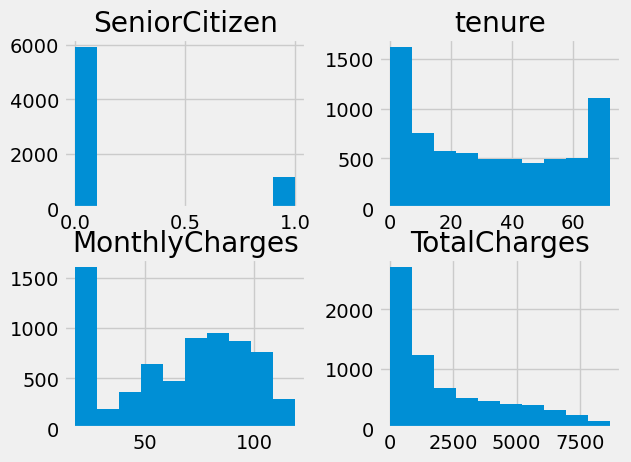

In [21]:
hist(df_copy)

<Axes: >

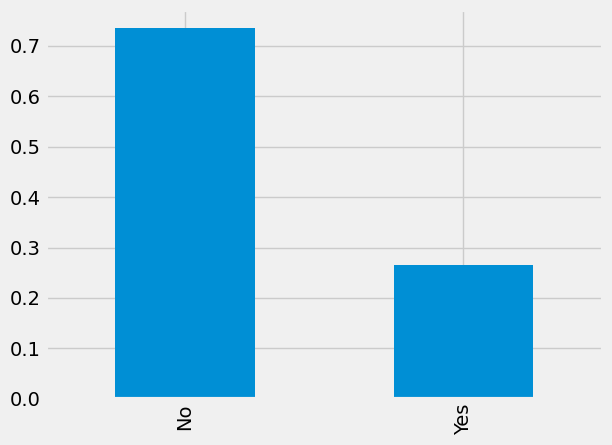

In [22]:
df_copy['Churn'].value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='gender', ylabel='count'>

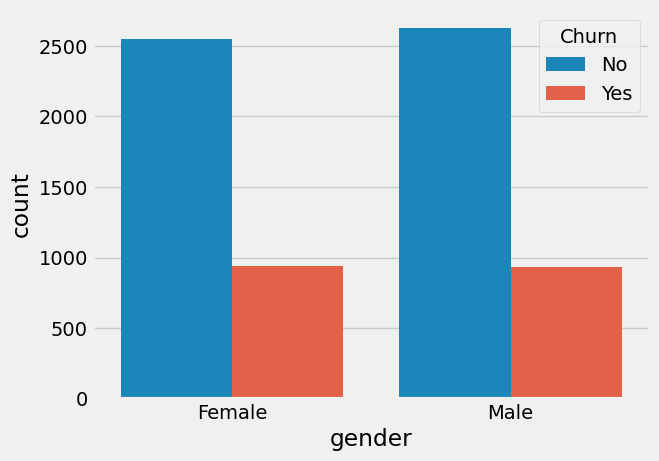

In [23]:
sns.countplot(x='gender',hue='Churn',data=df_copy)

In [24]:
df_copy['tenure'].max()

72

In [25]:
bins=[0,72,6]
labels=['0-12','13-24','25-36','37-48','49-60','61-72']
df_copy['tenure']=pd.cut(df_copy['tenure'],range(0,74,12),labels=labels)

<Axes: xlabel='tenure', ylabel='count'>

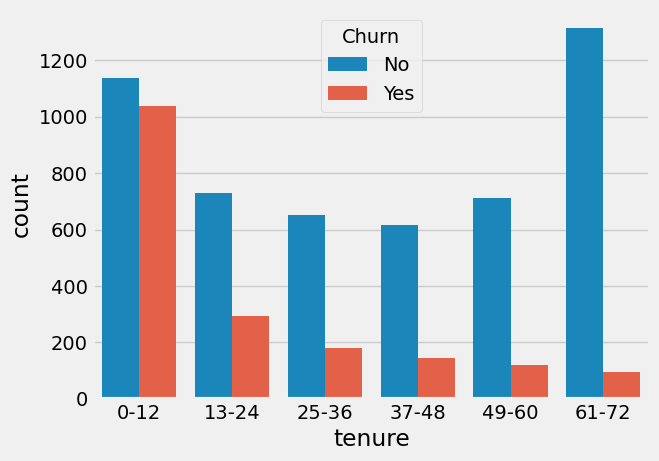

In [26]:
sns.countplot(data=df_copy,x='tenure',hue='Churn')

In [27]:
def count(feature,hue,data):
    print('countplot for {0}'.format(feature))
    plt.figure(figsize=(5,3))
    sns.countplot(data=df_copy,x=feature,hue=df_copy['Churn'])
    plt.show()

countplot for gender


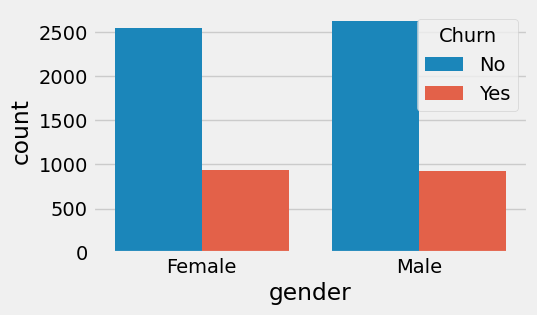

countplot for SeniorCitizen


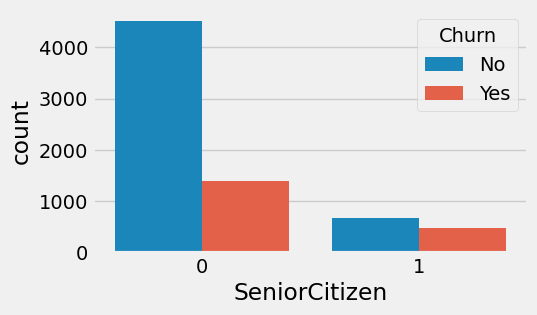

countplot for Partner


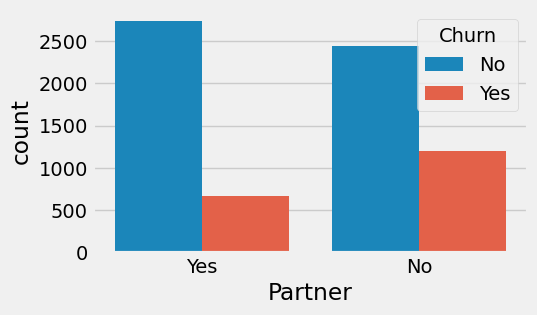

countplot for Dependents


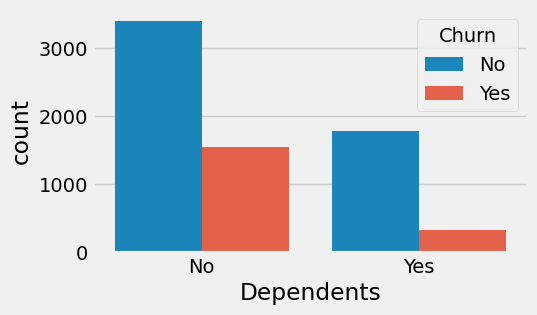

countplot for tenure


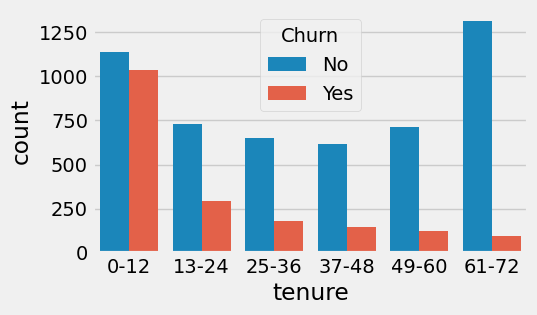

countplot for PhoneService


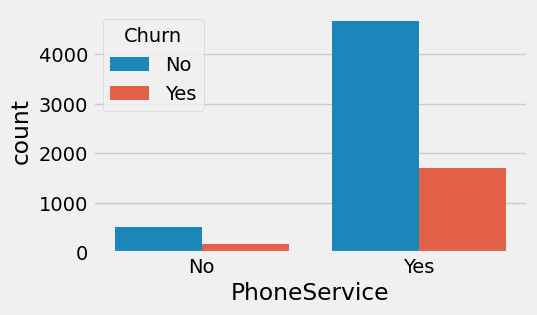

countplot for MultipleLines


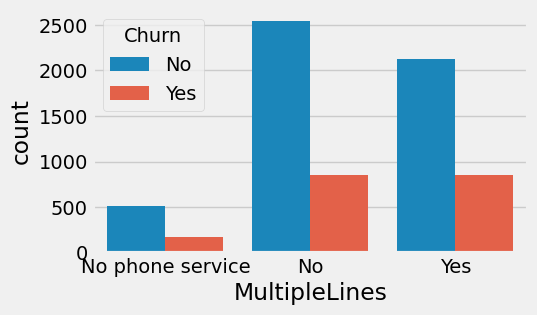

countplot for InternetService


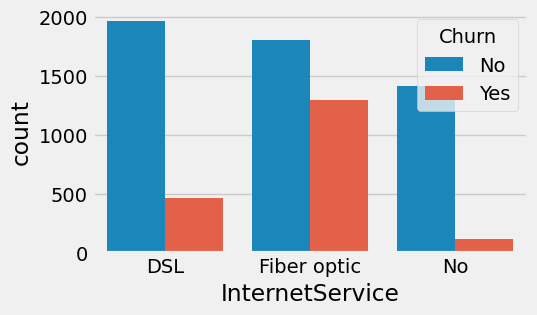

countplot for OnlineSecurity


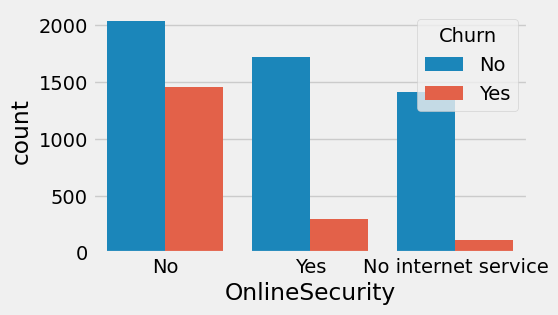

countplot for OnlineBackup


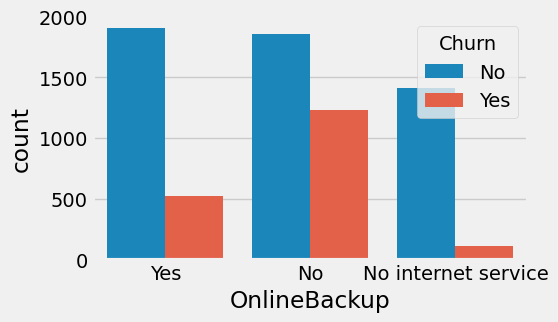

countplot for DeviceProtection


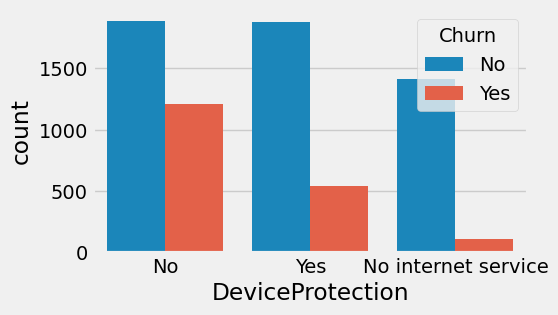

countplot for TechSupport


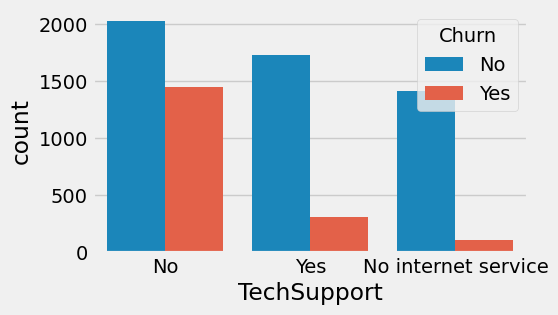

countplot for StreamingTV


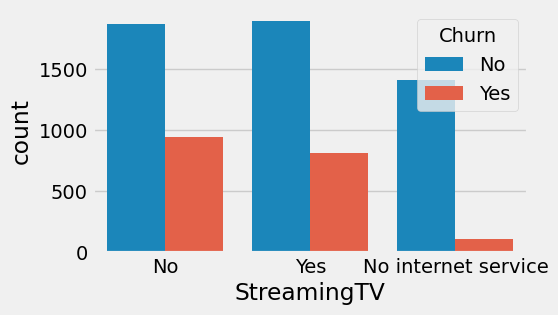

countplot for StreamingMovies


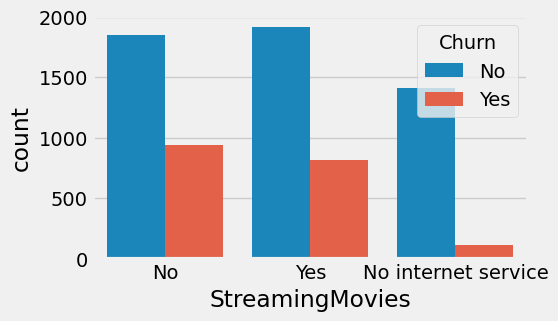

countplot for Contract


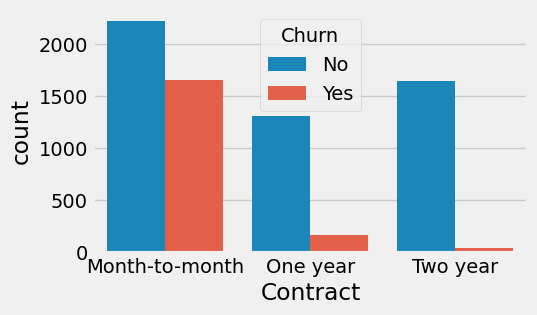

countplot for PaperlessBilling


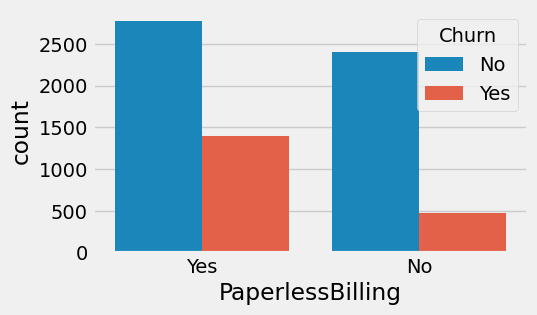

countplot for PaymentMethod


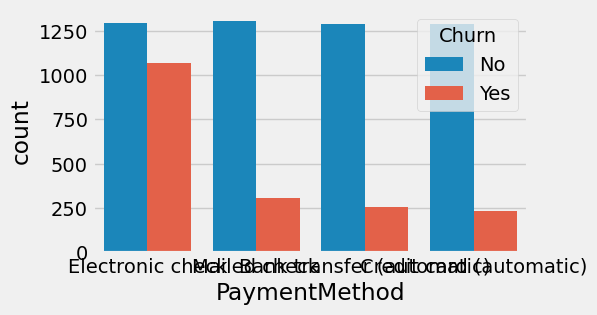

In [28]:
for col in df_copy.drop(['MonthlyCharges','TotalCharges', 'Churn'],axis=1):
    count(col,df_copy['Churn'],df_copy)

In [29]:
df_copy['tenure']=df_copy['tenure'].astype("O")
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7032 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


boxplot for SeniorCitizen


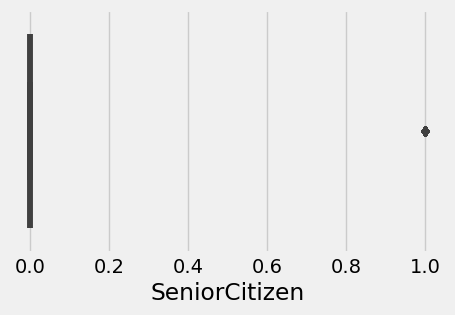

boxplot for MonthlyCharges


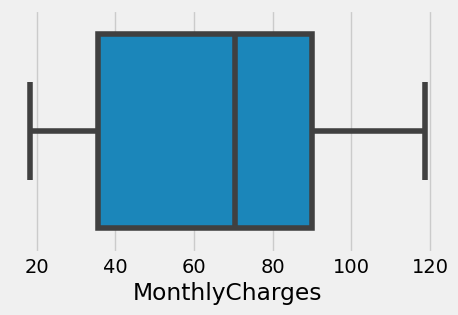

boxplot for TotalCharges


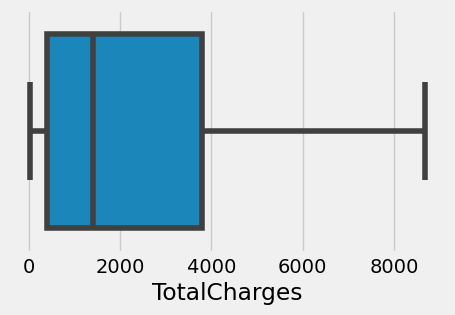

In [30]:
def box_plot (feature,data):
    print('boxplot for {0}'.format(feature))
    plt.figure(figsize=(5,3))
    sns.boxplot(x=feature,data=df_copy) 
    plt.show()
for col in df_copy.select_dtypes(exclude='O'):
    box_plot(col,df_copy)

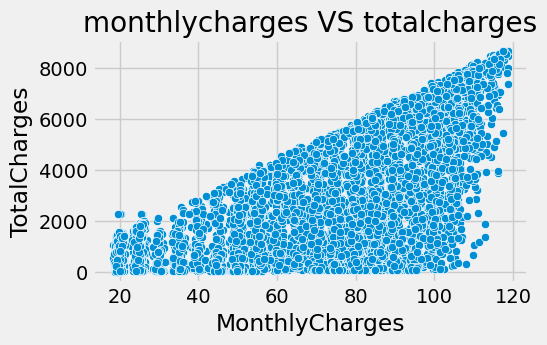

In [31]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df_copy)
plt.title("monthlycharges VS totalcharges")
plt.show()

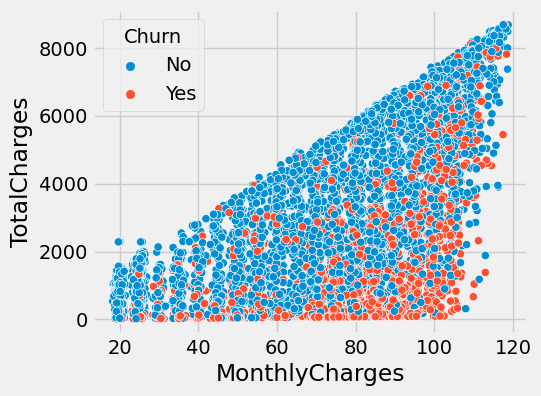

In [32]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df_copy,hue="Churn")
plt.show()

C:\Users\SOUMYA\AppData\Local\Temp\ipykernel_3776\3676313773.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='MonthlyCharges',hue='Churn',data=df_copy,shade=True)


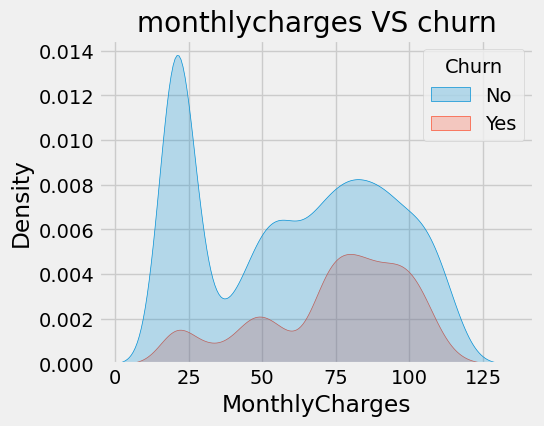

In [33]:
plt.figure(figsize=(5,4))
sns.kdeplot(x='MonthlyCharges',hue='Churn',data=df_copy,shade=True)
plt.title("monthlycharges VS churn")
plt.show()

C:\Users\SOUMYA\AppData\Local\Temp\ipykernel_3776\3793473912.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='TotalCharges',hue='Churn',data=df_copy,shade=True)


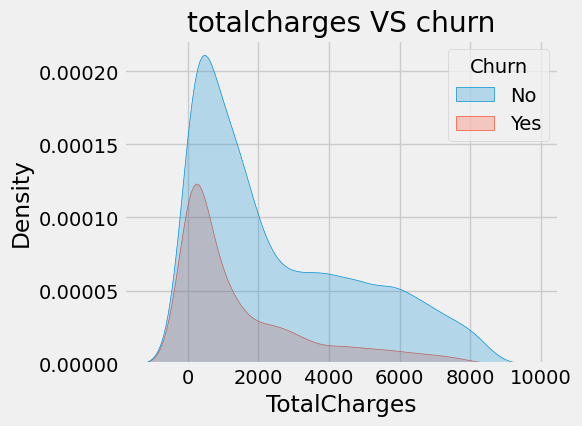

In [34]:
plt.figure(figsize=(5,4))
sns.kdeplot(x='TotalCharges',hue='Churn',data=df_copy,shade=True)
plt.title("totalcharges VS churn")
plt.show()

In [35]:
df_copy.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0-12,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,25-36,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,0-12,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,37-48,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,0-12,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


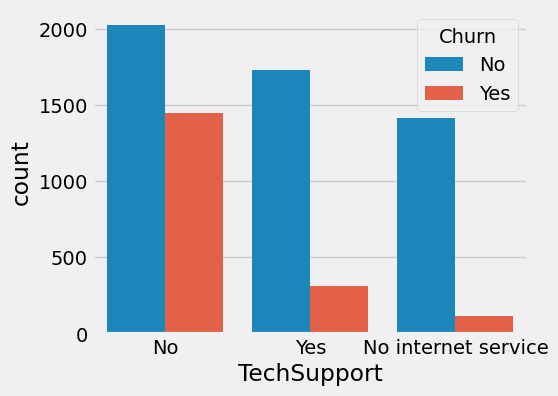

In [36]:
plt.figure(figsize=(5,4))
sns.countplot(x='TechSupport',hue='Churn',data=df_copy)
plt.show()

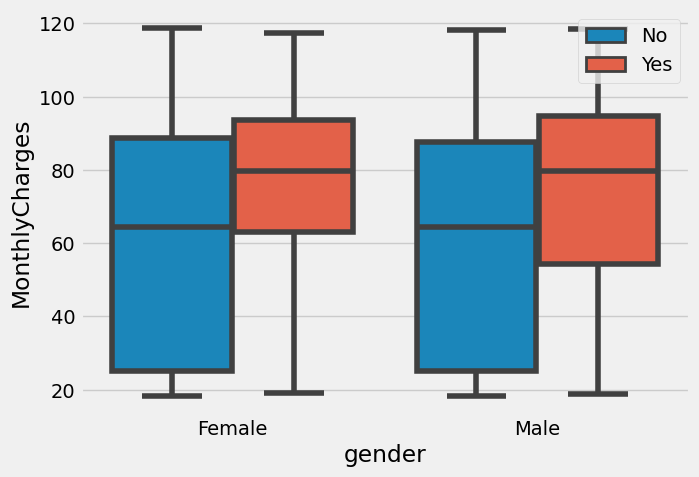

In [37]:
plt.figure(figsize=(7,5))
sns.boxplot(x='gender',y='MonthlyCharges',hue='Churn',data=df_copy)
plt.legend(loc='upper right')
plt.show()

In [38]:
df_churn=df[df_copy['Churn']=="Yes"]
df_notchurn=df[df_copy['Churn']=="No"]

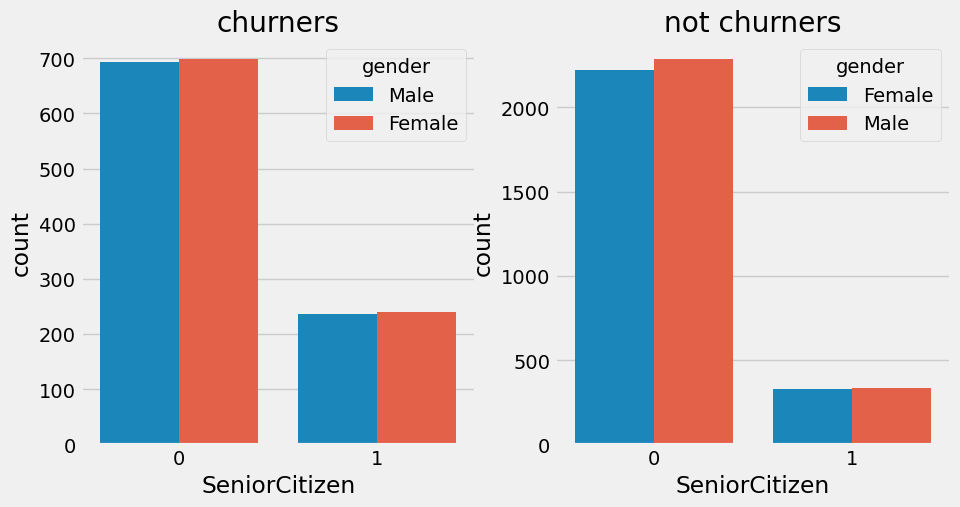

In [39]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='SeniorCitizen',hue='gender',data=df_churn)
plt.title("churners")
plt.subplot(1,2,2)
sns.countplot(x='SeniorCitizen',hue='gender',data=df_notchurn)
plt.title("not churners")
plt.show()

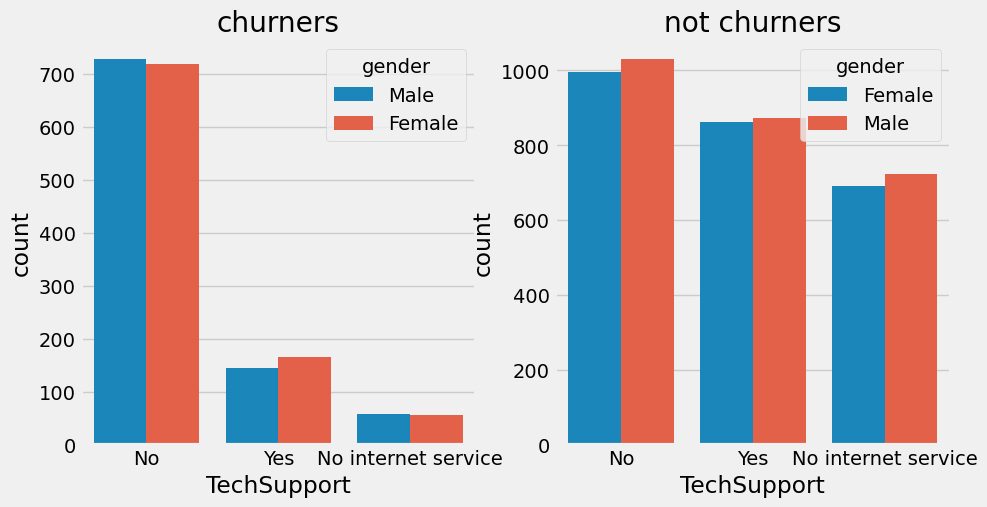

In [40]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='TechSupport',hue='gender',data=df_churn)
plt.title("churners")
plt.subplot(1,2,2)
sns.countplot(x='TechSupport',hue='gender',data=df_notchurn)
plt.title("not churners")
plt.show()

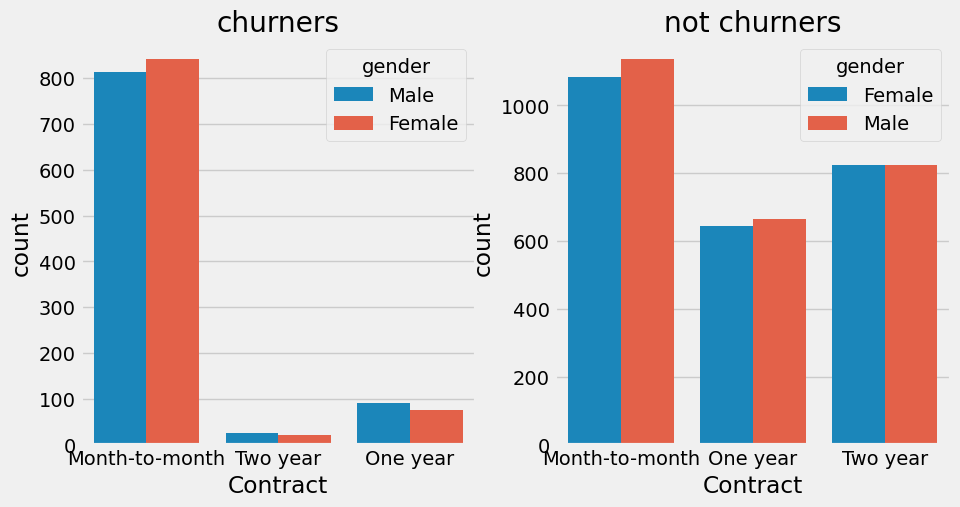

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='Contract',hue='gender',data=df_churn)
plt.title("churners")
plt.subplot(1,2,2)
sns.countplot(x='Contract',hue='gender',data=df_notchurn)
plt.title("not churners")
plt.show()

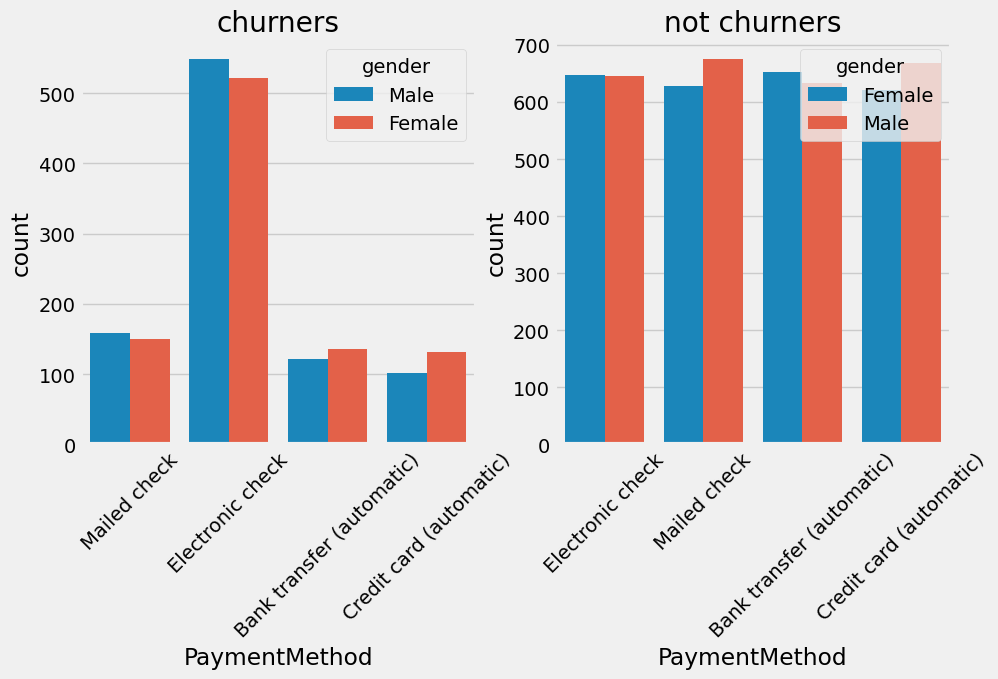

In [42]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='PaymentMethod',hue='gender',data=df_churn)
plt.title("churners")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(x='PaymentMethod',hue='gender',data=df_notchurn)
plt.title("not churners")
plt.xticks(rotation=45)
plt.show()

In [43]:
df_copy['Churn']=np.where(df_copy['Churn']=='Yes',1,0)
df_copy['gender']=np.where(df_copy['gender']=='Male',1,0)

In [44]:
df_copy['tenure']=df_copy['tenure'].map({'0-12':1,'13-24':2,'25-36':3, '37-48':4,'49-60':5,'61-72':6})

In [45]:
df_copy['Churn'].unique()

array([0, 1])

In [46]:
df_copy=pd.get_dummies(df_copy)

In [47]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int32  
 1   SeniorCitizen                            7043 non-null   int64  
 2   tenure                                   7032 non-null   float64
 3   MonthlyCharges                           7043 non-null   float64
 4   TotalCharges                             7043 non-null   float64
 5   Churn                                    7043 non-null   int32  
 6   Partner_No                               7043 non-null   uint8  
 7   Partner_Yes                              7043 non-null   uint8  
 8   Dependents_No                            7043 non-null   uint8  
 9   Dependents_Yes                           7043 non-null   uint8  
 10  PhoneService_No                          7043 no

In [48]:
df_copy[df_copy.columns[:]].corr()['Churn']

gender                                    -0.008612
SeniorCitizen                              0.150889
tenure                                    -0.340311
MonthlyCharges                             0.193356
TotalCharges                              -0.199428
Churn                                      1.000000
Partner_No                                 0.150448
Partner_Yes                               -0.150448
Dependents_No                              0.164221
Dependents_Yes                            -0.164221
PhoneService_No                           -0.011942
PhoneService_Yes                           0.011942
MultipleLines_No                          -0.032569
MultipleLines_No phone service            -0.011942
MultipleLines_Yes                          0.040102
InternetService_DSL                       -0.124214
InternetService_Fiber optic                0.308020
InternetService_No                        -0.227890
OnlineSecurity_No                          0.342637
OnlineSecuri

In [49]:
df_copy.isnull().sum()

gender                                      0
SeniorCitizen                               0
tenure                                     11
MonthlyCharges                              0
TotalCharges                                0
Churn                                       0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No                   

In [50]:
df_copy.dropna(how='any',inplace=True)

In [51]:
df_copy.isnull().sum()

gender                                     0
SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBack

<Axes: >

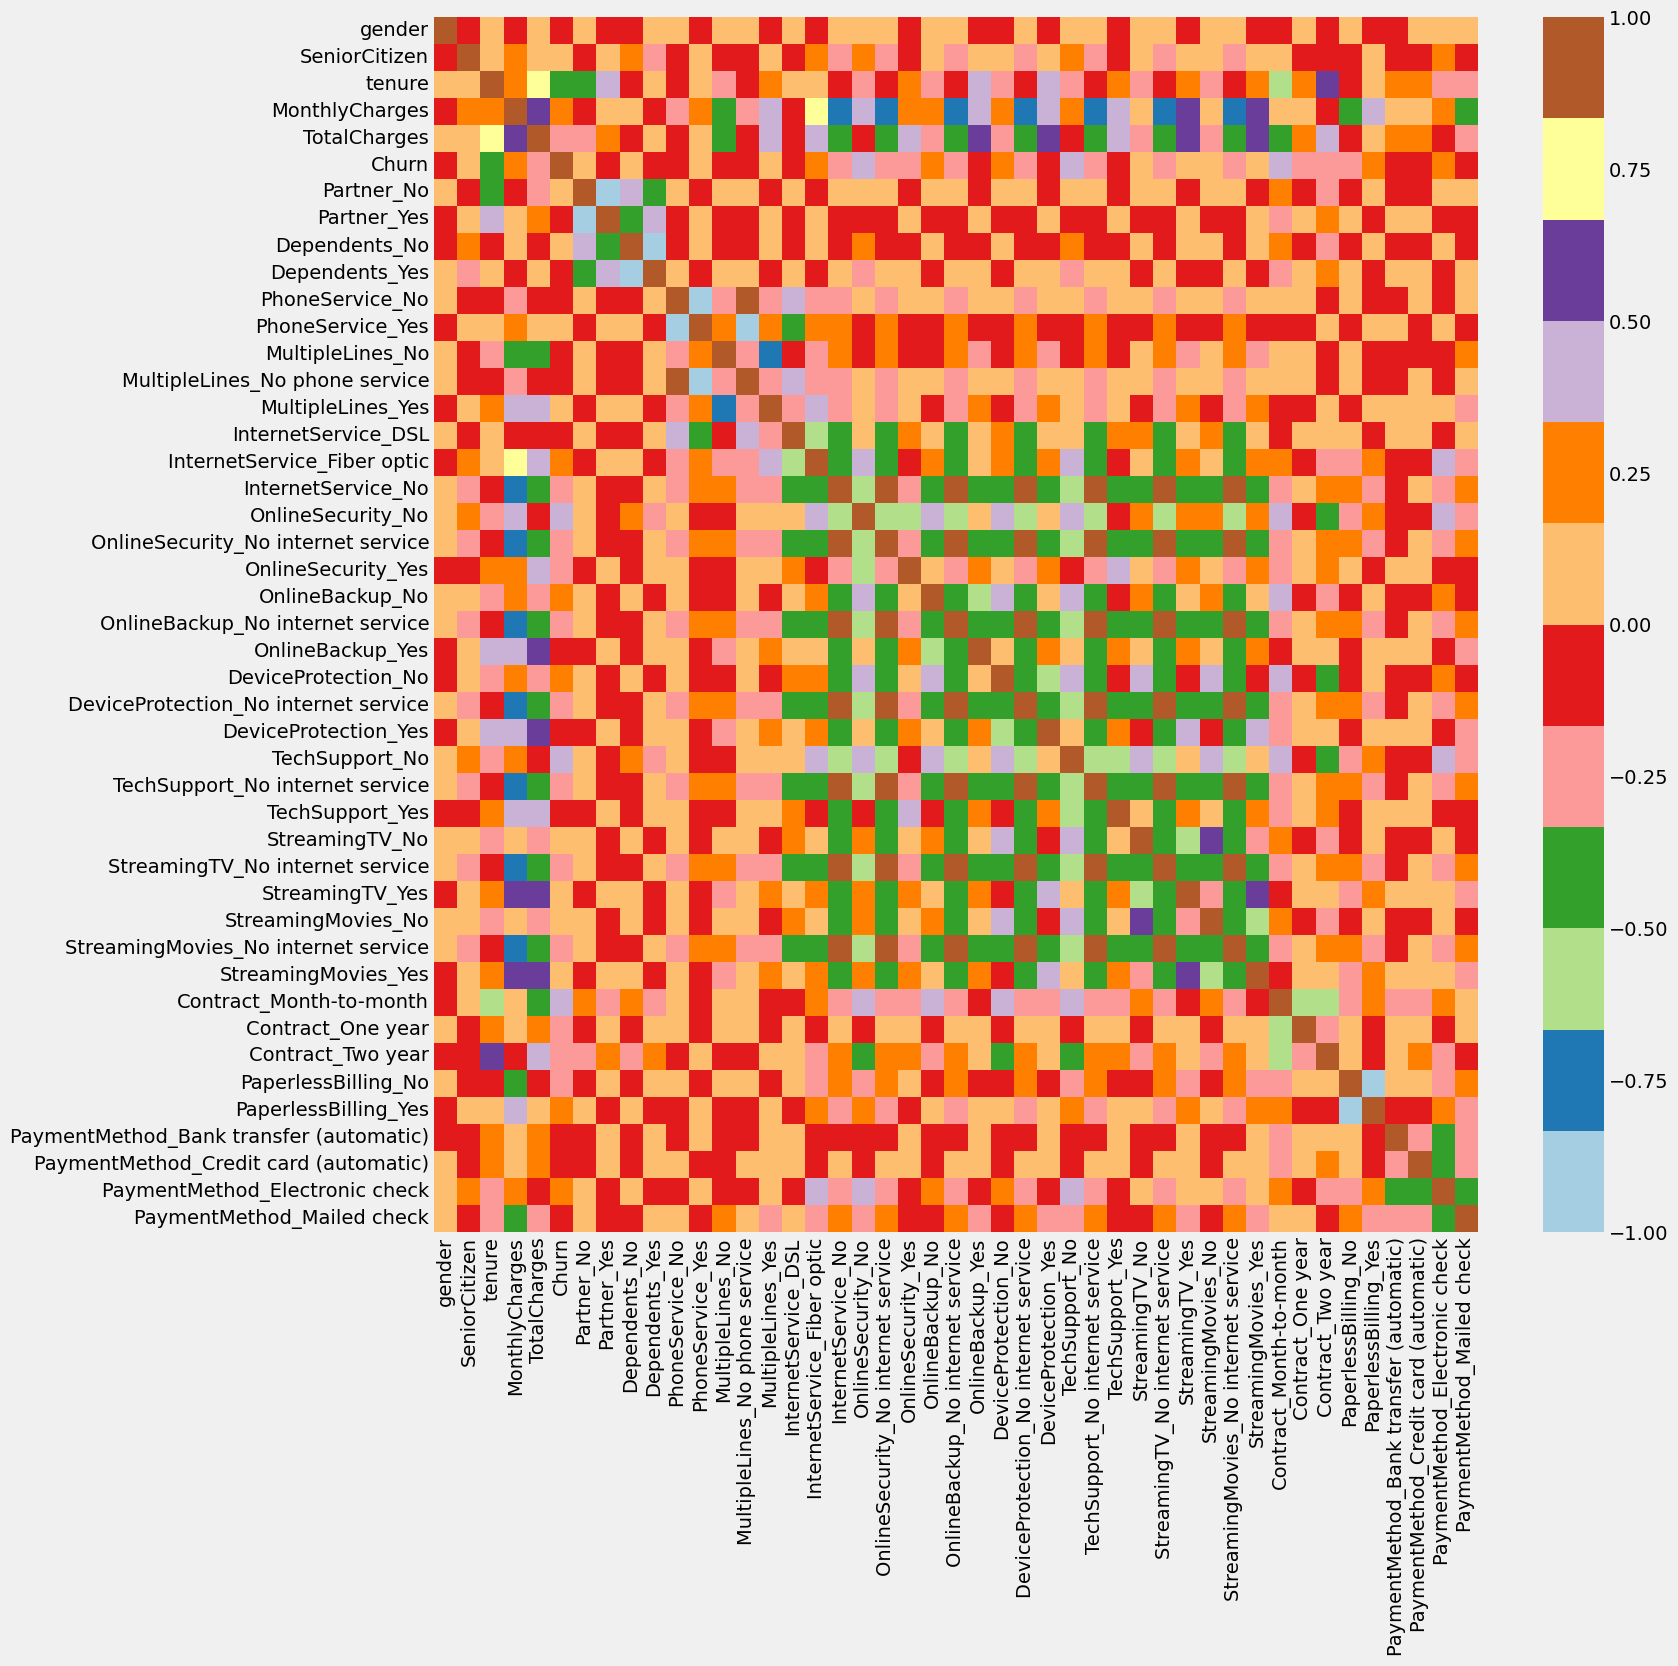

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(df_copy.corr(),cmap="Paired")

In [53]:
df_copy.to_csv("tele_churn.csv")

In [54]:
from imblearn.combine import SMOTEENN